In [44]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from IPython.core.display  import HTML
from IPython.display       import Image
warnings.filterwarnings("ignore")

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
     
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [3]:
df_raw = pd.read_csv('data/telecom_treino.csv')
teste = pd.read_csv('data/telecom_teste.csv') 

In [4]:
df_raw.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [5]:
teste.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [6]:
df_raw = df_raw.drop(['Unnamed: 0'], axis=1)
teste = teste.drop(['Unnamed: 0'], axis=1)

# 1.0 DESCRICAO DOS DADOS

In [7]:
df1 = df_raw.copy()

In [8]:
len(df1)

3333

In [9]:
df1.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [10]:
df1.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [11]:
df1['churn'].value_counts()

no     2850
yes     483
Name: churn, dtype: int64

## 1.1 Descriptive Statistical

In [12]:
num_attributes = df1.select_dtypes(include = ["int64", "float64"])
cat_attributes = df1.select_dtypes(include = ["object"])

### 1.1.1 Numerical Attributes

In [13]:
# Central Tendency -media, mediana
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, max, min, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenete
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m. columns = ["attributes", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,account_length,1.00,243.00,242.00,101.064806,101.00,39.816132,0.096606,-0.107836
1,number_vmail_messages,0.00,51.00,51.00,8.099010,0.00,13.686312,1.264824,-0.051129
2,total_day_minutes,0.00,350.80,350.80,179.775098,179.40,54.459218,-0.029077,-0.019940
3,total_day_calls,0.00,165.00,165.00,100.435644,101.00,20.066073,-0.111787,0.243182
4,total_day_charge,0.00,59.64,59.64,30.562307,30.50,9.258045,-0.029083,-0.019812
5,total_eve_minutes,0.00,363.70,363.70,200.980348,201.40,50.706236,-0.023877,0.025630
6,total_eve_calls,0.00,170.00,170.00,100.114311,100.00,19.919636,-0.055563,0.206156
7,total_eve_charge,0.00,30.91,30.91,17.083540,17.12,4.310021,-0.023858,0.025487
8,total_night_minutes,23.20,395.00,371.80,200.872037,201.20,50.566260,0.008921,0.085816
9,total_night_calls,33.00,175.00,142.00,100.107711,100.00,19.565674,0.032500,-0.072020


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='account_length', ylabel='Density'>

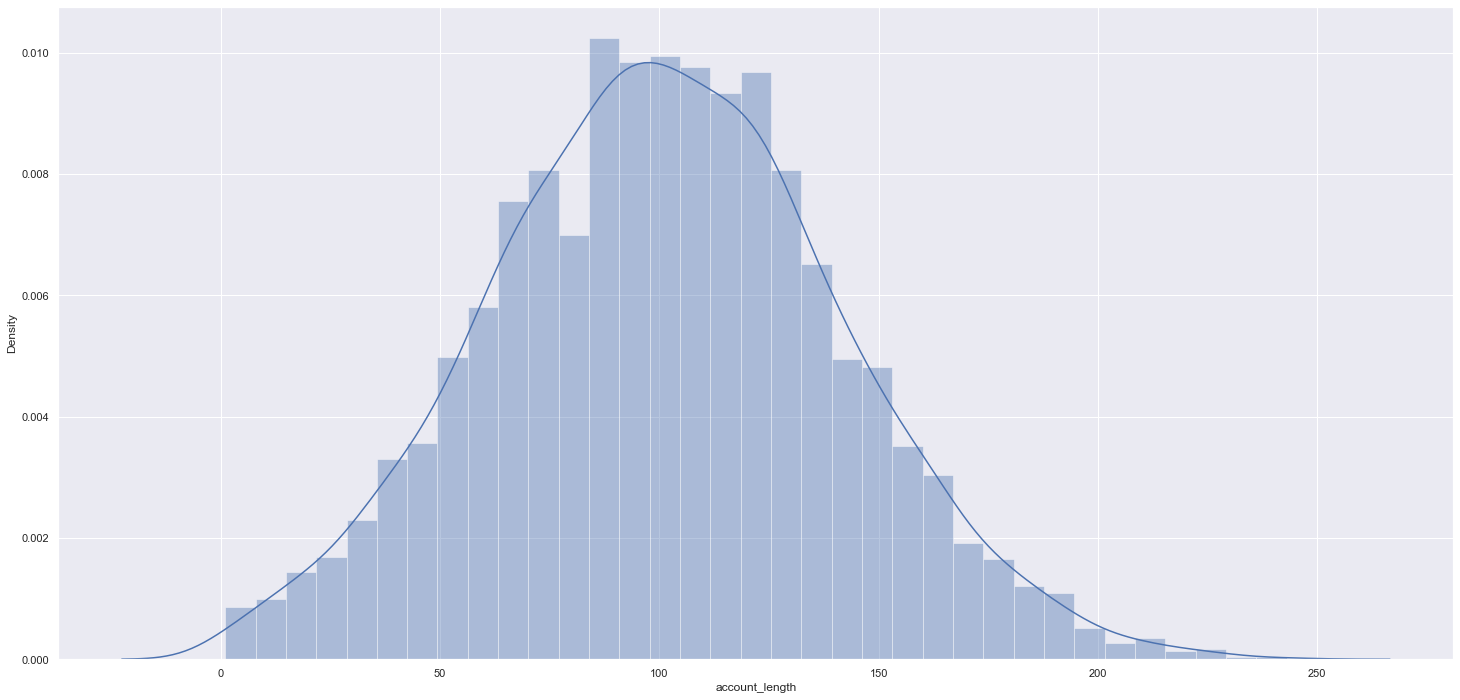

In [14]:
sns.distplot( df1["account_length"] )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_customer_service_calls', ylabel='count'>

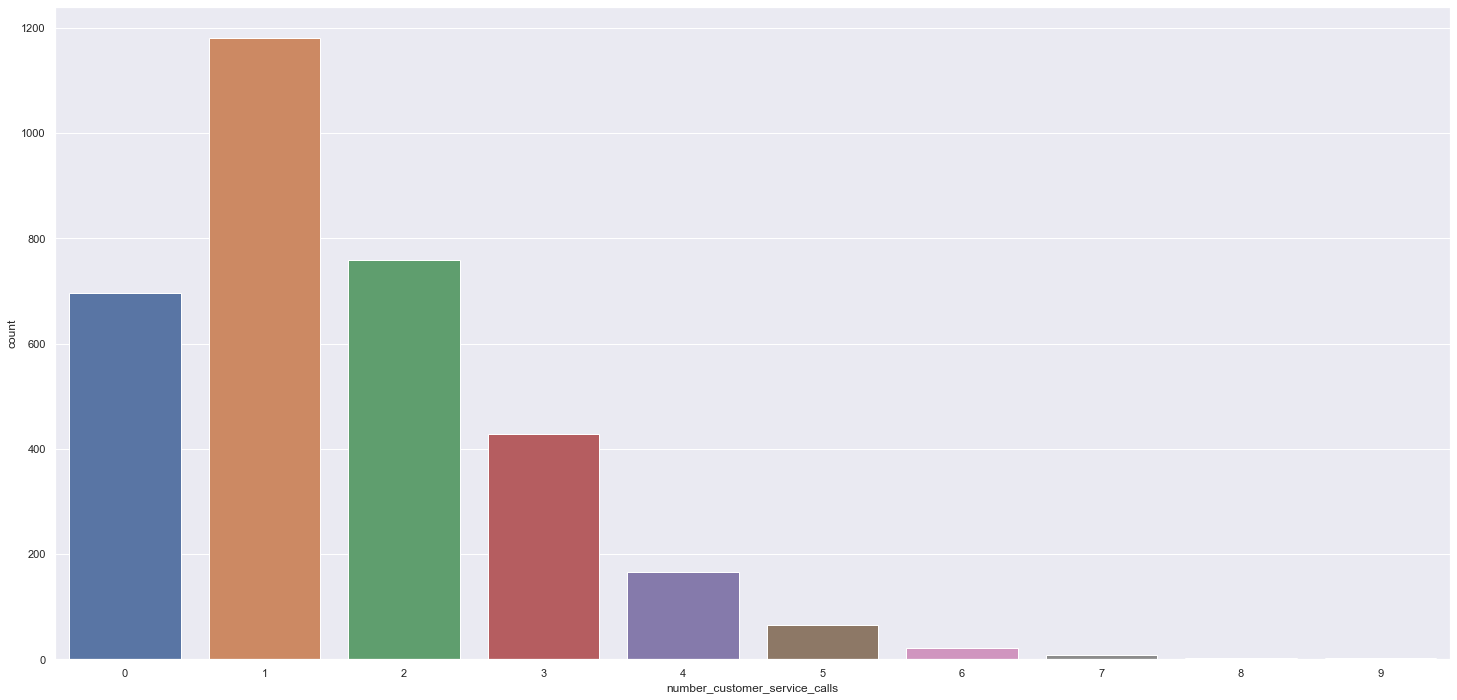

In [15]:
sns.countplot( df1["number_customer_service_calls"] )

### 1.2.2 Categorical Attribute

In [16]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state                 51
area_code              3
international_plan     2
voice_mail_plan        2
churn                  2
dtype: int64

<AxesSubplot:xlabel='churn', ylabel='number_customer_service_calls'>

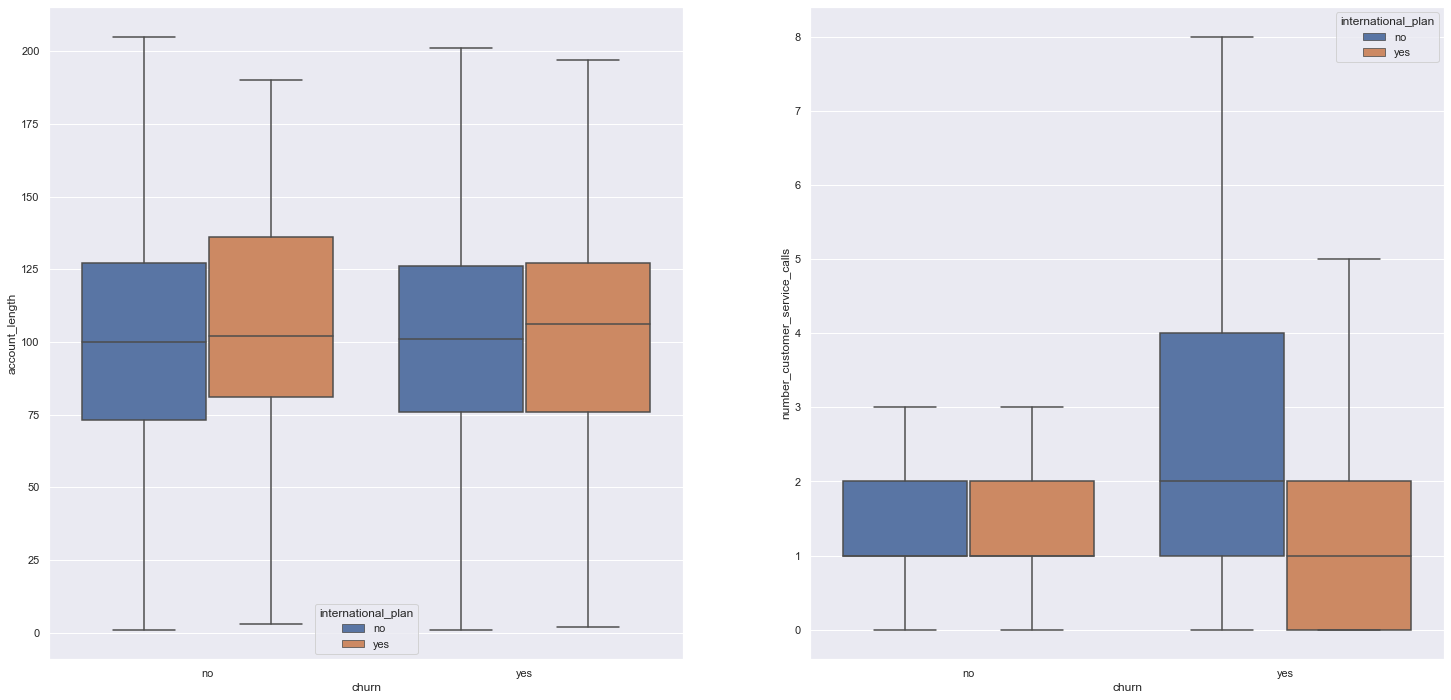

In [17]:
plt.subplot(1, 2, 1)
sns.boxplot( x="churn",y="account_length", data=df1, showfliers=False, hue='international_plan' )

plt.subplot(1, 2, 2)
sns.boxplot( x="churn",y="number_customer_service_calls", data=df1, showfliers=False, hue='international_plan' )


# 2.0  FEATURE ENGINEERING

In [18]:
df2 = df1.copy()

## 2.1 Mapa mental de Hipóteses

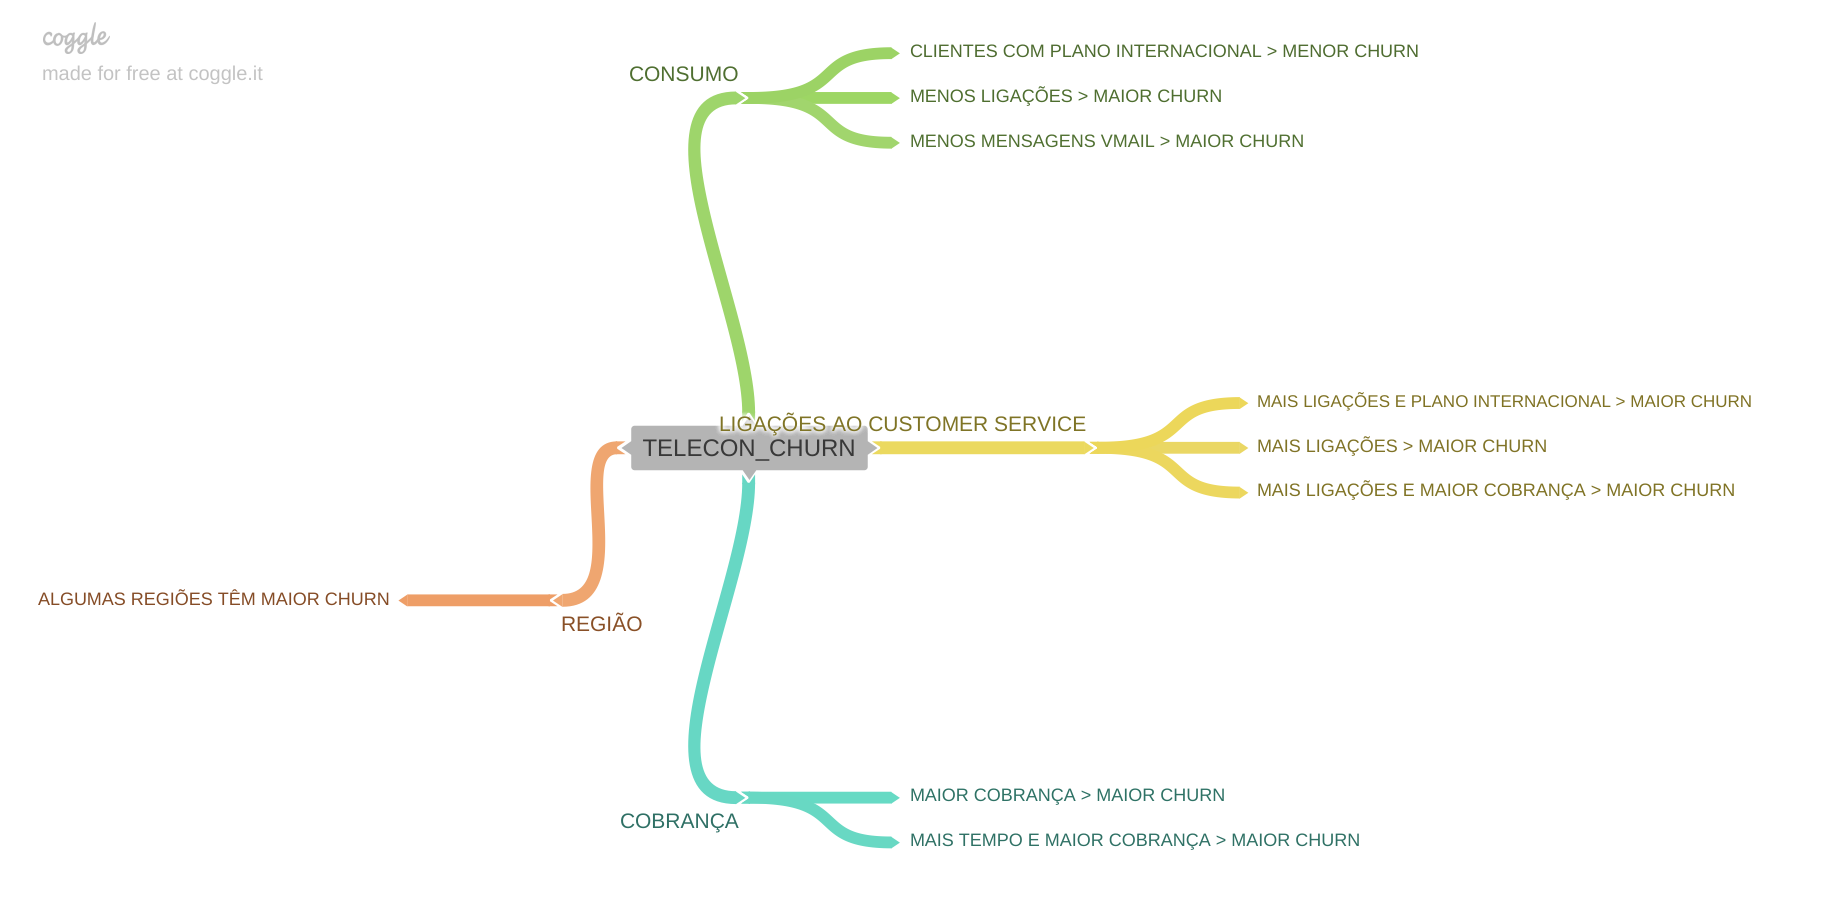

In [19]:
Image("img/TELECON_CHURN.png")

## 2.2 Feature Engineering

In [20]:
df2['total_minutes'] =  df2['total_day_minutes'] + df2['total_eve_minutes'] + df2['total_night_minutes']               
df2['total_calls'] = df2['total_day_calls'] + df2['total_eve_calls'] + df2['total_night_calls']                  
df2['total_charge'] = df2['total_day_charge'] + df2['total_eve_charge'] + df2['total_night_charge']

In [21]:
df2['tarifa_day'] = df2['total_day_charge']/df2['total_day_minutes']

In [22]:
df2['tarifa_eve'] = df2['total_eve_charge']/df2['total_eve_minutes']
df2['tarifa_night'] = df2['total_night_charge']/df2['total_night_minutes']

In [23]:
df2.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
total_minutes                    0
total_calls                      0
total_charge                     0
tarifa_day                       2
tarifa_eve                       1
tarifa_night                     0
dtype: int64

In [24]:
df2 = df2.fillna(0)

In [25]:
aux = df2[['total_minutes', 'total_calls', 'total_charge', 'tarifa_day', 'tarifa_eve', 'tarifa_night']]

In [26]:
# Central Tendency -media, mediana
ct1 = pd.DataFrame(aux.apply(np.mean)).T
ct2 = pd.DataFrame(aux.apply(np.median)).T

# Dispersion - std, max, min, range, skew, kurtosis
d1 = pd.DataFrame(aux.apply(np.std)).T
d2 = pd.DataFrame(aux.apply(min)).T
d3 = pd.DataFrame(aux.apply(max)).T
d4 = pd.DataFrame(aux.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(aux.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(aux.apply(lambda x: x.kurtosis())).T

#concatenete
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m. columns = ["attributes", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,total_minutes,275.200000,876.900000,601.700000,581.627483,583.100000,89.955832,-0.036998,-0.043584
1,total_calls,188.000000,410.000000,222.000000,300.657666,301.000000,34.323082,-0.039384,-0.153420
2,total_charge,19.980000,92.560000,72.580000,56.685173,56.630000,10.486243,-0.033641,0.039298
3,tarifa_day,0.000000,0.170513,0.170513,0.169901,0.170004,0.004163,-40.801688,1663.849936
4,tarifa_eve,0.000000,0.085075,0.085075,0.084976,0.085000,0.001472,-57.721446,3332.176611
5,tarifa_night,0.044828,0.045111,0.000284,0.045000,0.045000,0.000017,-0.301543,4.288021


In [27]:
df2.loc[1, "international_plan"]

'no'

In [28]:
for n in range(len(df2)):
    
    if (df2.loc[n, "international_plan"]=='yes') & (df2.loc[n, "voice_mail_plan"]=='no'):
        df2.loc[n,'numero_de_planos'] = 1
    if (df2.loc[n, "international_plan"]=='no') & (df2.loc[n, "voice_mail_plan"]=='yes'):
        df2.loc[n,'numero_de_planos'] = 1
    if (df2.loc[n, "international_plan"]=='yes') & (df2.loc[n, "voice_mail_plan"]=='yes'):
        df2.loc[n,'numero_de_planos'] = 2
    if (df2.loc[n, "international_plan"]=='no') & (df2.loc[n, "voice_mail_plan"]=='no'):
        df2.loc[n,'numero_de_planos'] = 0

In [29]:
print('Número de clientes com os dois planos: ',len(df2[df2['numero_de_planos']==2]))
print('Número de clientes com um plano: ',len(df2[df2['numero_de_planos']==1]))
print('Número de clientes sem nenhum plano: ',len(df2[df2['numero_de_planos']==0]))

Número de clientes com os dois planos:  92
Número de clientes com um plano:  1061
Número de clientes sem nenhum plano:  2180


In [132]:
for n in range(len(df2)):
    if df2.loc[n, "number_vmail_messages"]==0:
        df2.loc[n,'usou_vmail'] = 'no'
    else:
        df2.loc[n,'usou_vmail'] = 'yes'

In [133]:
df2['usou_vmail'].value_counts(normalize=True)

no     0.723372
yes    0.276628
Name: usou_vmail, dtype: float64

In [105]:
df2["count_churn"] = df2["churn"].apply( lambda x: 0 if x=='no' else 1)

# 3.0 ANALISE EXPLORATORIA DOS DADOS

In [134]:
df3 = df2.copy()

In [135]:
df3.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,tarifa_day,tarifa_eve,tarifa_night,numero_de_planos,count_churn,usou_vmail
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no,707.2,300,72.86,0.170011,0.085005,0.044994,1.0,0,yes
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,611.5,329,55.54,0.169988,0.085013,0.045008,1.0,0,yes
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,527.2,328,59.00,0.170008,0.084983,0.045018,0.0,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,558.2,248,65.02,0.170007,0.084976,0.044997,1.0,0,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,501.9,356,49.36,0.170006,0.085030,0.044997,1.0,0,no


## 3.1 Analise Univarida

### 3.1.1 Response variable

In [32]:
df3["churn"].value_counts(normalize=True)

no     0.855086
yes    0.144914
Name: churn, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

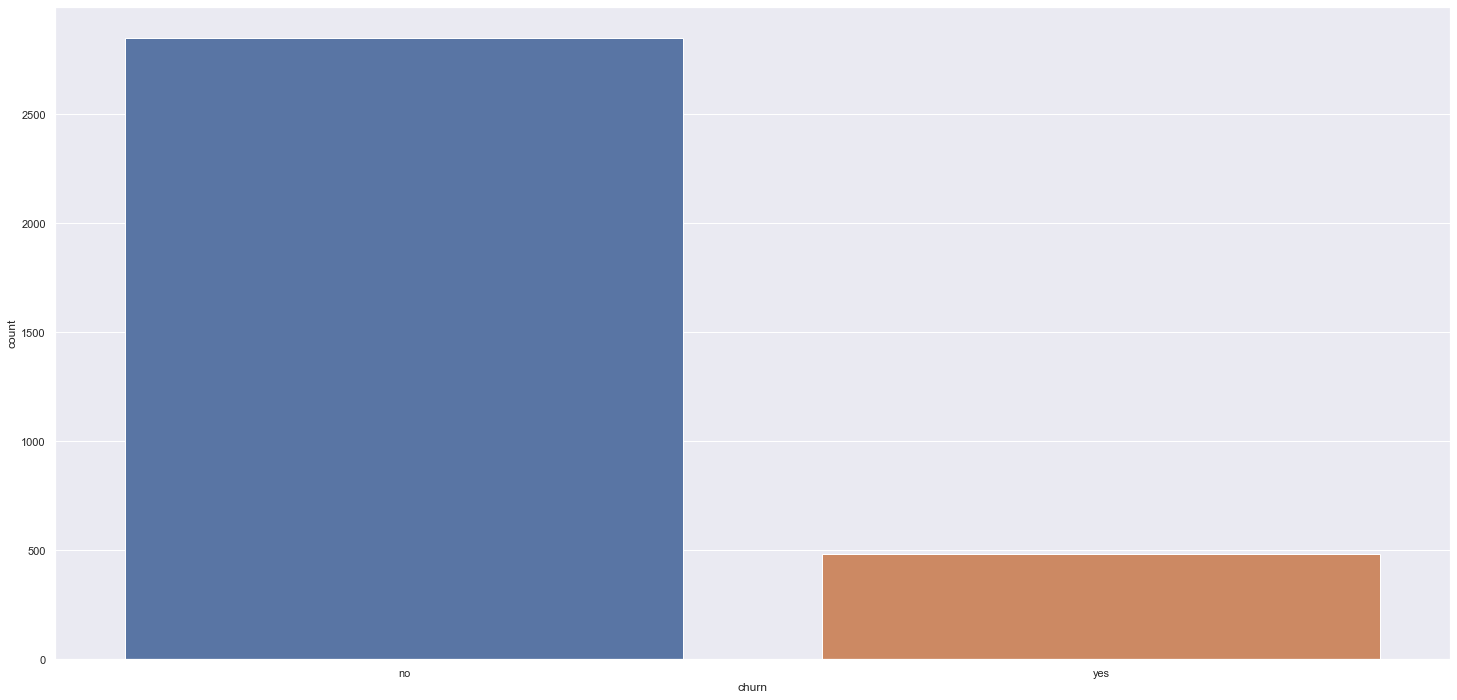

In [33]:
sns.countplot(df3["churn"])

### 4.1.2 Numerical variable

In [34]:
num_attributes = df3.select_dtypes(include = ["int64", "float64"])
cat_attributes = df3.select_dtypes(include = ["object"])

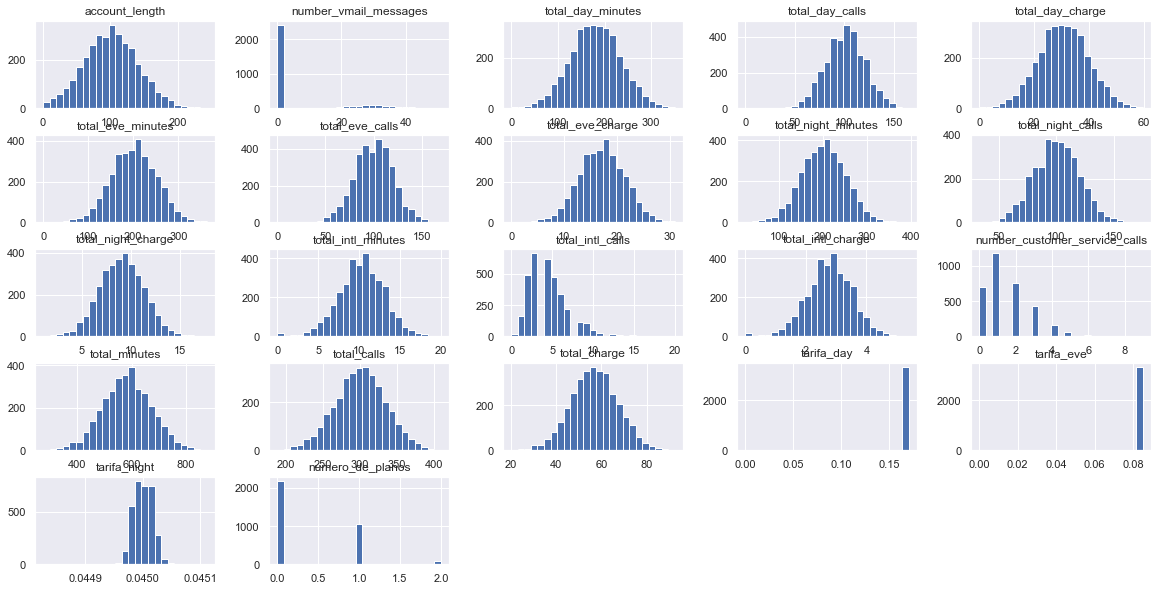

In [35]:
num_attributes.hist( bins=25 , figsize = (20,10));

### 3.1.3 Categorical Variable

In [36]:
cat_attributes.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [37]:
df3['area_code'].value_counts()

area_code_415    1655
area_code_510     840
area_code_408     838
Name: area_code, dtype: int64

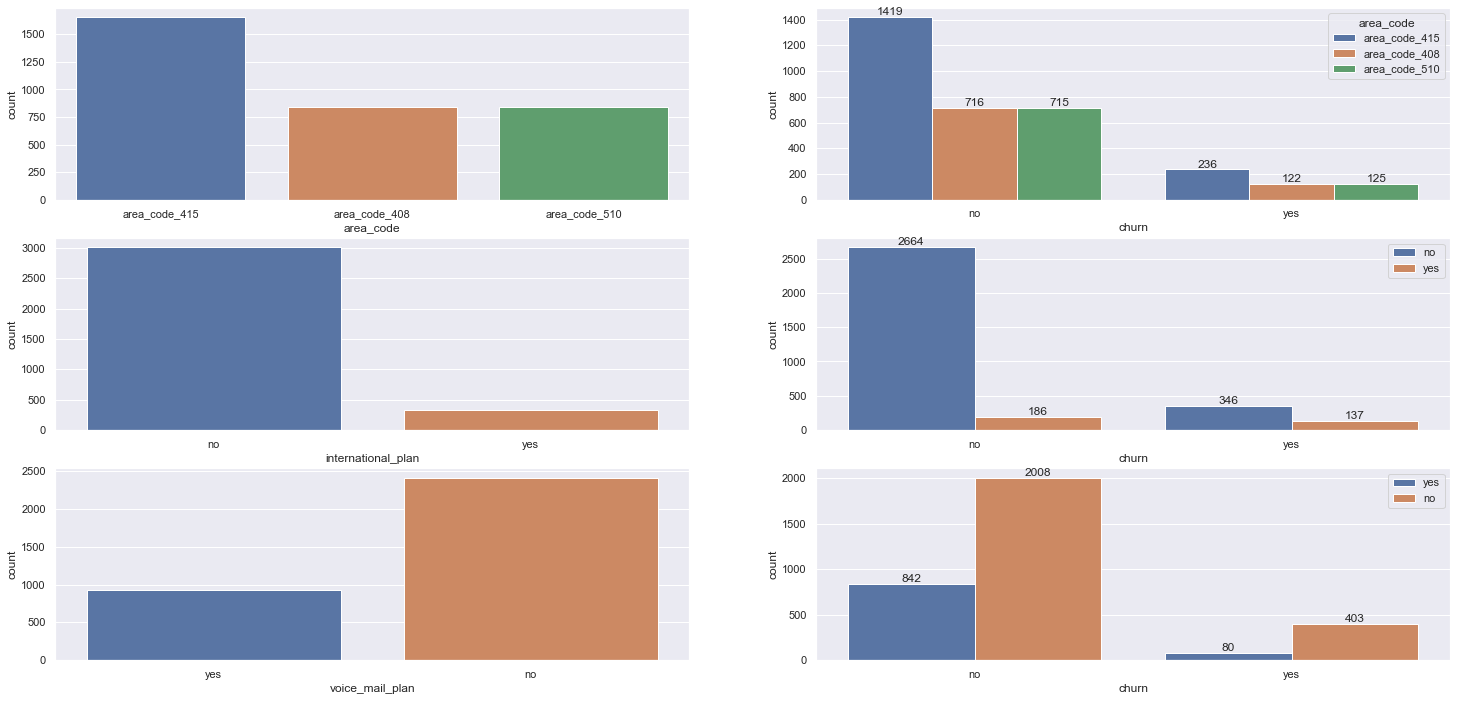

In [53]:
plt.subplot(3,2,1)
ax1 = sns.countplot( df3["area_code"] )

plt.subplot(3,2,2)
ax2 = sns.countplot( df3["churn"], hue=df3["area_code"])
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])
ax2.bar_label(ax2.containers[2])

#store_type
plt.subplot(3,2,3)
ax3 = sns.countplot( df3["international_plan"] )


plt.subplot(3,2,4)
ax4 = sns.countplot( df3["churn"], hue=df3["international_plan"])
ax4.bar_label(ax4.containers[0])
ax4.bar_label(ax4.containers[1])
plt.legend()

#assortment	
plt.subplot(3,2,5)
ax5 = sns.countplot( df3["voice_mail_plan"] )


plt.subplot(3,2,6)
ax6 = sns.countplot( df3["churn"], hue=df3["voice_mail_plan"])
ax6.bar_label(ax6.containers[0])
ax6.bar_label(ax6.containers[1])
plt.legend()

In [69]:
a = df3[['state','churn']]
a['count'] = 1
pd.pivot_table(a, index='state', columns='churn', aggfunc=np.sum).T

state        AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA  MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY
      churn                                                                                                                                                                                                            
count no     49  72  44  60  25  57  62  49  52  55  46  50  41  64  53  62  57  51  47  54  53  49  57  69  56  51  54  57  56  56  47  50  56  52  68  68  52  67  37  59  46  52  48  54  62  72  65  52  71  96  68
      yes     3   8  11   4   9   9  12   5   9   8   8   3   3   9   5   9  13   8   4  11  17  13  16  15   7  14  14  11   6   5   9  18   6  14  15  10   9  11   8   6  14   8   5  18  10   5   8  14   7  10   9

## 3.2 Análise Bivariada

### H1. Clientes com mais planos tem menor representatividade no churn
**FALSO** Clientes com um ou nenhum plano seguem a mesma distribuição, porém os com dois planos parecem mais propensos a churn

In [99]:
dois_planos = pd.DataFrame(df3[df3['numero_de_planos']==2]['churn'].value_counts(normalize=True)).reset_index()
um_plano = pd.DataFrame(df3[df3['numero_de_planos']==1]['churn'].value_counts(normalize=True)).reset_index()
nenhum_plano = pd.DataFrame(df3[df3['numero_de_planos']==0]['churn'].value_counts(normalize=True)).reset_index()
aux1 = nenhum_plano.merge(um_plano, on='index', suffixes=('_nenhum_plano', '_um_plano')).\
merge(dois_planos, on='index').rename(columns={"churn": "churn_dois_planos", 'index': 'churn'})

In [100]:
aux1

,churn,churn_nenhum_plano,churn_um_plano,churn_dois_planos
0,no,0.861468,0.863336,0.608696
1,yes,0.138532,0.136664,0.391304


### H2. Clientes com maior consumo são menos propensos a churn
**DEPENDE** Os clientes que realizaram o churn têm mais minutos em chamada do que os clientes ativos, porém vemos que os clientes que não usam o 
vmail estão mais propensos ao churn

<AxesSubplot:xlabel='usou_vmail', ylabel='porcentagem_churn'>

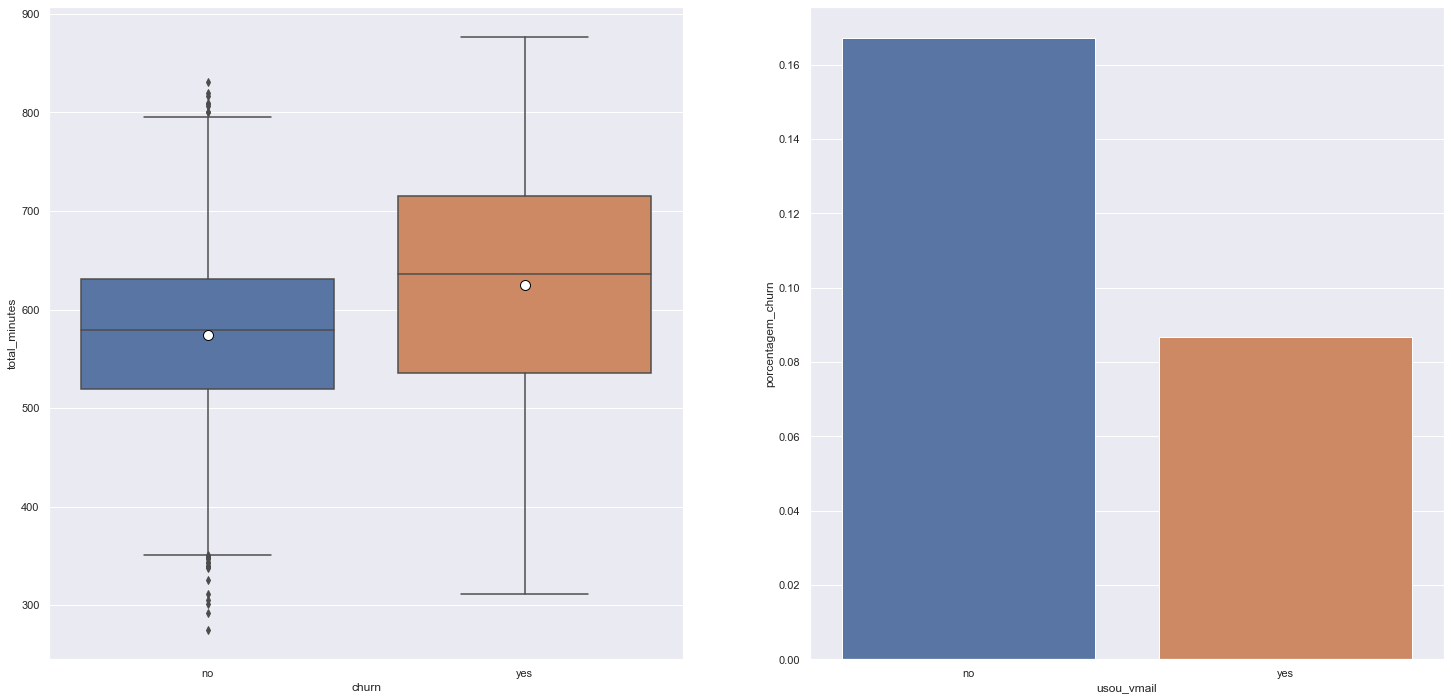

In [158]:
aux1 = df3[['churn', 'total_minutes']]
aux2 = df3[['usou_vmail','count_churn']].groupby("usou_vmail").sum().reset_index()
aux3 = pd.DataFrame(df3['usou_vmail'].value_counts()).reset_index()
aux4 = aux2.merge(aux3, right_on='index', left_on='usou_vmail',suffixes=('', '_count')).drop(['index'], axis=1)
aux4['porcentagem_churn']=aux4['count_churn']/aux4['usou_vmail_count']
plt.subplot(1,2,1)
sns.boxplot( x="churn",y='total_minutes', data=aux1, showmeans=True, meanprops={"marker":"o", 
                                                                                "markerfacecolor":"white", 
                                                                                "markeredgecolor":"black", 
                                                                                "markersize":"10"})

plt.subplot(1,2,2)
sns.barplot(x='usou_vmail',y='porcentagem_churn',data=aux4)

### H3. Clientes que estão sendo mais cobrados estão mais propensos ao churn